In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [296]:
data = pd.read_csv('/Users/barborabetkova/Documents/GitHub/Bank_Churn_Prediction/ChurnPrediction/churn-prediction.csv')

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [252]:
#Importing relevant liblaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [253]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [254]:
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

# Basic analysis

In [255]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36.0,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46.0,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27.0,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36.0,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36.0,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [256]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [257]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [258]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book              float64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [260]:
#Unique values in categorical variables:
data["Gender"].nunique()
data["Education_Level"].unique()
data["Marital_Status"].nunique()

4

In [261]:
#Target variable (Attrition_Flag) distribution
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# FEATURE ENCODING

In [262]:
# categorical feature encoding
# one hot encoding for models like Logistic regression; Label encoding - random tree forrest. It depends on the cardinality of the encoding variable. Gender, Education_Level, Marital_Status
columns = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status']
dummies = pd.get_dummies(data[['Attrition_Flag', 'Gender', 'Education_Level','Marital_Status' ]])

data = pd.concat([data, dummies], axis='columns')

data.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [263]:
# Gender label encoding
#Note: Male: 1; Female 0

from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

data['Gender']= label.fit_transform(data['Gender']) 
print(data['Gender'].unique())

[1 0]


In [297]:
#Education_Level Ordinal encoding

#df = {'Education_level': ['Unknown','Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']}
#dataO=pd.DataFrame(data)

#High School = 3, 


#Label Encoding
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

#data['Education_Level']= label.fit_transform(data['Education_Level']) 
label.fit(data['Education_Level']) 
print(data['Education_Level'].unique())


['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [298]:
list(label.classes_)

['College',
 'Doctorate',
 'Graduate',
 'High School',
 'Post-Graduate',
 'Uneducated',
 'Unknown']

In [299]:
le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(le_name_mapping)

{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}


In [231]:
#Marital Status Label encoding

from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

data['Marital_Status']= label.fit_transform(data['Marital_Status']) 
print(data['Marital_Status'].unique())

[1 2 3 0]


# Customer Age

In [147]:
Customer_Age = data['Customer_Age']

In [148]:
Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

<AxesSubplot:>

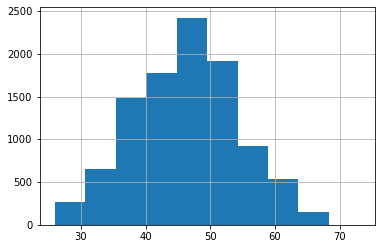

In [149]:
Customer_Age.hist()

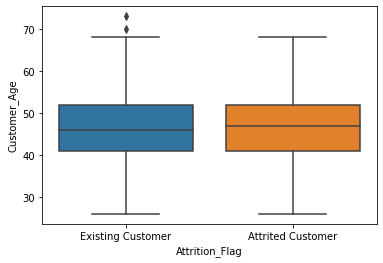

In [110]:
sns.boxplot(data=data, x="Attrition_Flag", y="Customer_Age",)
plt.show()

Text(0.5, 1.0, 'Customer Age  for target variable Attrition_Flag')

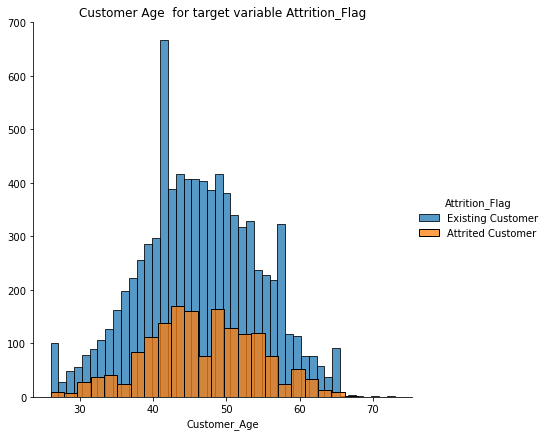

In [118]:
sns.FacetGrid(data, hue='Attrition_Flag', height=6) \
.map(sns.histplot, 'Customer_Age') \
.add_legend()
plt.title('Customer Age  for target variable Attrition_Flag')

In [ ]:
#Finding outliers

In [ ]:
#Grouping age into different categories

# Gender

In [150]:
Gender = data['Gender']

In [151]:
Gender.describe()

count     10127
unique        2
top           F
freq       5358
Name: Gender, dtype: object

<AxesSubplot:>

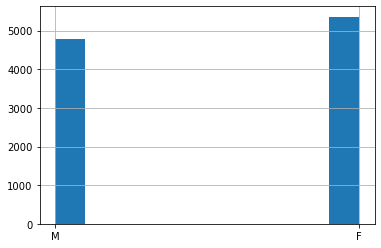

In [154]:
Gender.hist()

Text(0.5, 1.0, 'Gender  for target variable Attrition_Flag')

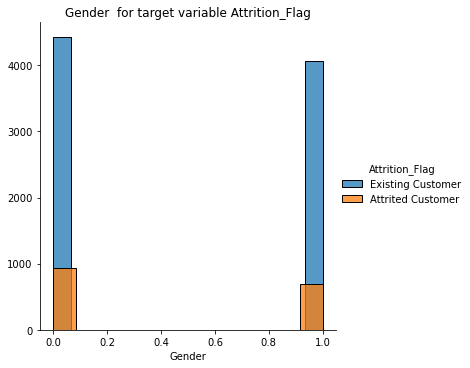

In [238]:
sns.FacetGrid(data, hue='Attrition_Flag', height=5) \
.map(sns.histplot, 'Gender') \
.add_legend()
plt.title('Gender  for target variable Attrition_Flag')

In [208]:
print(data.Gender)

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: int64


# Dependent Count

In [152]:
Dependent_count = data['Dependent_count']

In [153]:
Dependent_count.describe()

count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

<AxesSubplot:>

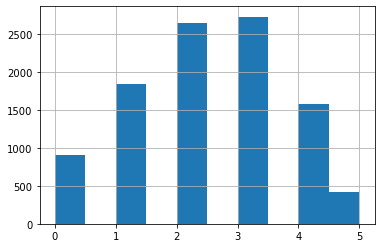

In [159]:
Dependent_count.hist()

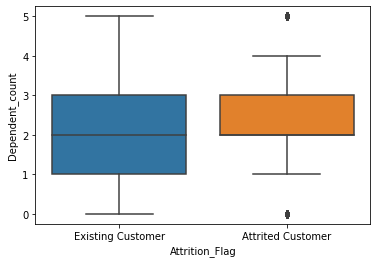

In [77]:
sns.boxplot(data=data, x="Attrition_Flag", y="Dependent_count",)
plt.show()

Text(0.5, 1.0, 'Dependent Count  for target variable Attrition_Flag')

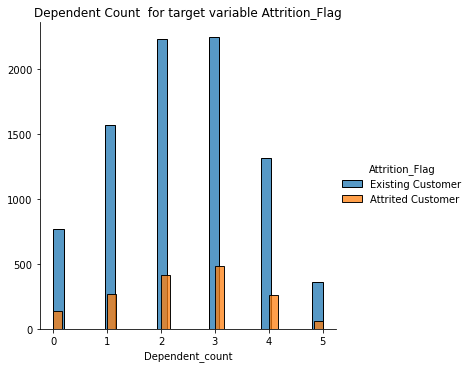

In [116]:
sns.FacetGrid(data, hue='Attrition_Flag', height=5) \
.map(sns.histplot, 'Dependent_count') \
.add_legend()
plt.title('Dependent Count  for target variable Attrition_Flag')

# Educational Level

In [162]:
Education_Level = data['Education_Level']

In [163]:
Education_Level.describe()

count        10127
unique           7
top       Graduate
freq          3128
Name: Education_Level, dtype: object

<AxesSubplot:>

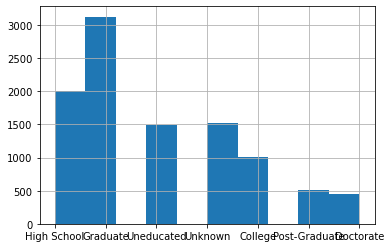

In [166]:
Education_Level.hist()

In [273]:
#Making "Unknown" into NaN

data['Education_Level'] = data['Education_Level'].replace(0, np.nan,)


<AxesSubplot:>

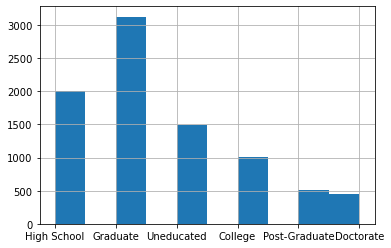

In [274]:
Education_Level.hist()

In [282]:
# filling in missing values for Education Level

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
 

# Edu Level- with KNN imputer
data.Education_Level = imputer.fit_transform(data.Education_Level.values.reshape(-1, 1))
data.Education_Level =data.Education_Level.astype(float)


Text(0.5, 1.0, 'Education Level  for target variable Attrition_Flag')

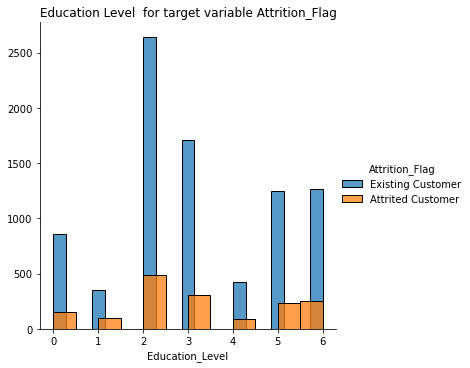

In [283]:
sns.FacetGrid(data, hue='Attrition_Flag', height=5) \
.map(sns.histplot, 'Education_Level') \
.add_legend()
plt.title('Education Level  for target variable Attrition_Flag')

# Marital Status

In [173]:
Marital_Status = data['Marital_Status']

In [174]:
Marital_Status.describe()

count       10127
unique          4
top       Married
freq         4687
Name: Marital_Status, dtype: object

<AxesSubplot:>

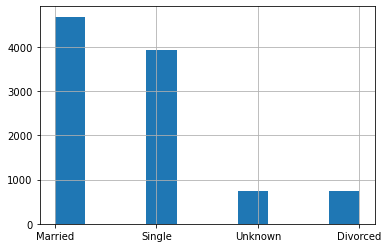

In [175]:
Marital_Status.hist()

In [241]:
#Handling the missing values

#Making "Unknown" into NaN

data['Marital_Status'] = data['Marital_Status'].replace('Unknown', np.nan,)

In [242]:
# filling in missing values for Marital Status

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
 

# Edu Level- with KNN imputer
data.Marital_Status = imputer.fit_transform(data.Marital_Status.values.reshape(-1, 1))
data.Marital_Status =data.Marital_Status.astype(str)



<AxesSubplot:>

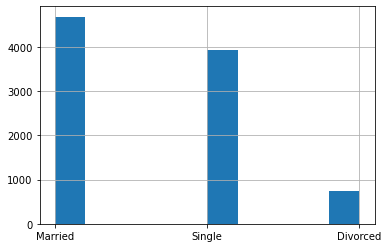

In [243]:
Marital_Status.hist()

Text(0.5, 1.0, 'Marital Status  for target variable Attrition_Flag')

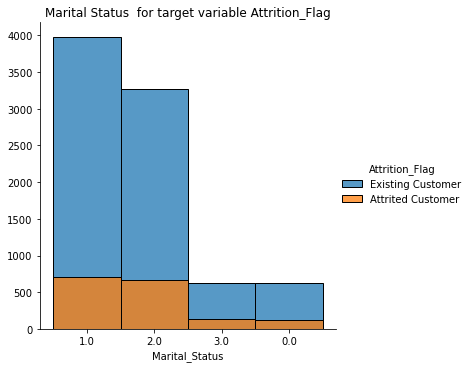

In [244]:
sns.FacetGrid(data, hue='Attrition_Flag', height=5) \
.map(sns.histplot, 'Marital_Status') \
.add_legend()
plt.title('Marital Status  for target variable Attrition_Flag')

# Overall Attrition Flag

In [176]:
Attrition_Flag = data['Attrition_Flag']

In [177]:
Attrition_Flag.describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

<AxesSubplot:>

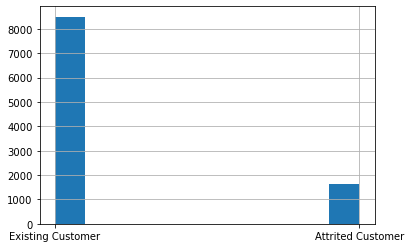

In [178]:
Attrition_Flag.hist()

In [14]:
categorical = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical = [x for x in data.columns.to_list() if x not in categorical]

print(numerical)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [11]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.Customer_Age.quantile(x/100)))
iqr = data.Customer_Age.quantile(0.75) - data.Customer_Age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 60.0
96% of people having age are less than equal to 60.0
97% of people having age are less than equal to 62.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 65.0
100% of people having age are less than equal to 73.0
IQR 11.0


In [13]:
list_1 = [data]
for column in list_1:
    column.loc[column["Customer_Age"] < 30,  'age_group'] = 30
    column.loc[(column["Customer_Age"] >= 30) & (column["Customer_Age"] <= 44), 'age_group'] = 40
    column.loc[(column["Customer_Age"] >= 45) & (column["Customer_Age"] <= 59), 'age_group'] = 50
    column.loc[column["Customer_Age"] >= 60, 'age_group'] = 60

In [16]:
count_age_attition_flag = pd.crosstab(data['Attrition_Flag'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_attition_flag = count_age_attition_flag.transpose()

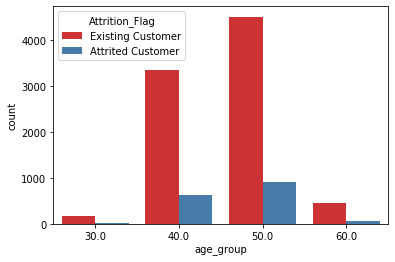

In [17]:
sns.countplot(x='age_group', data=data, hue='Attrition_Flag', palette="Set1")

In [22]:
data.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
age_group                   False
dtype: bool

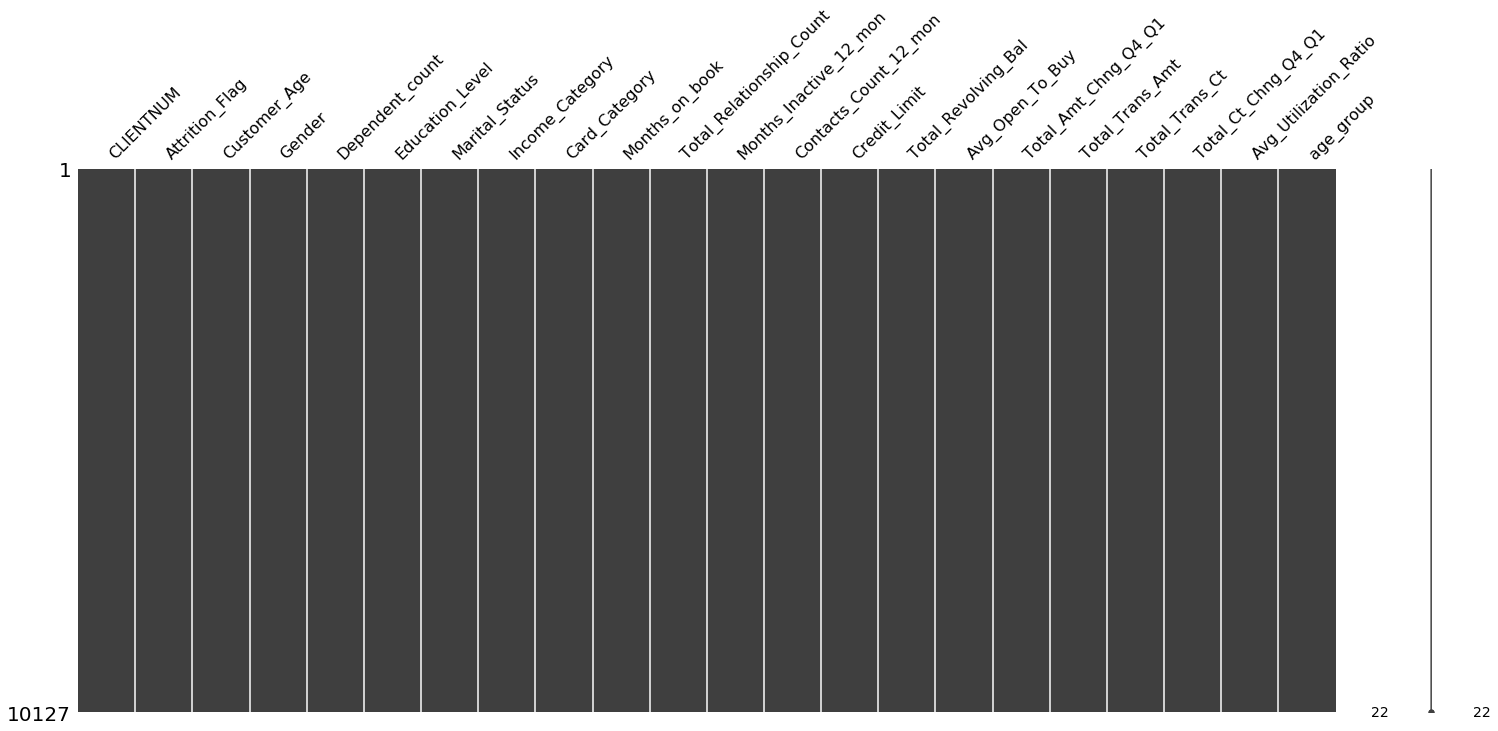

In [18]:
missingno.matrix(data)

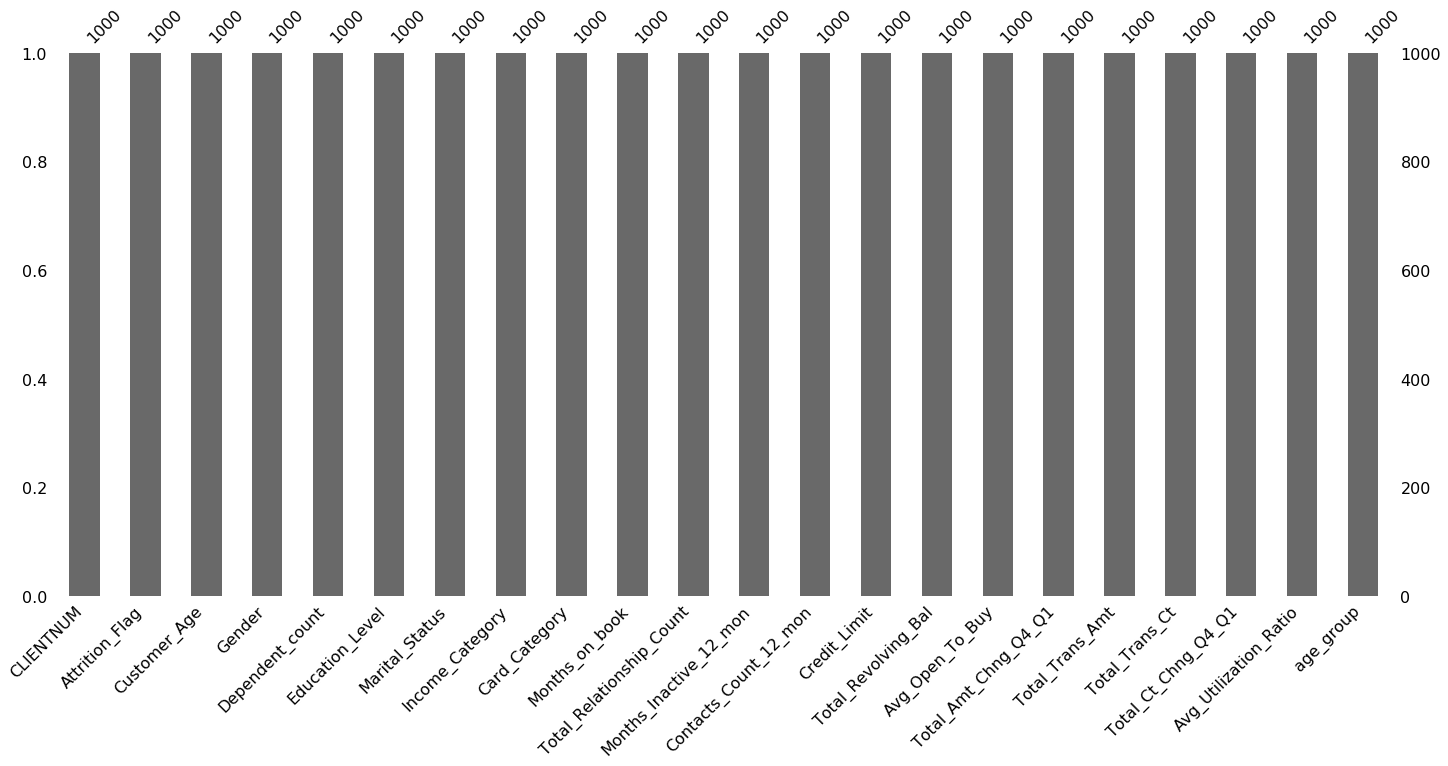

In [19]:
missingno.bar(data.sample(1000))

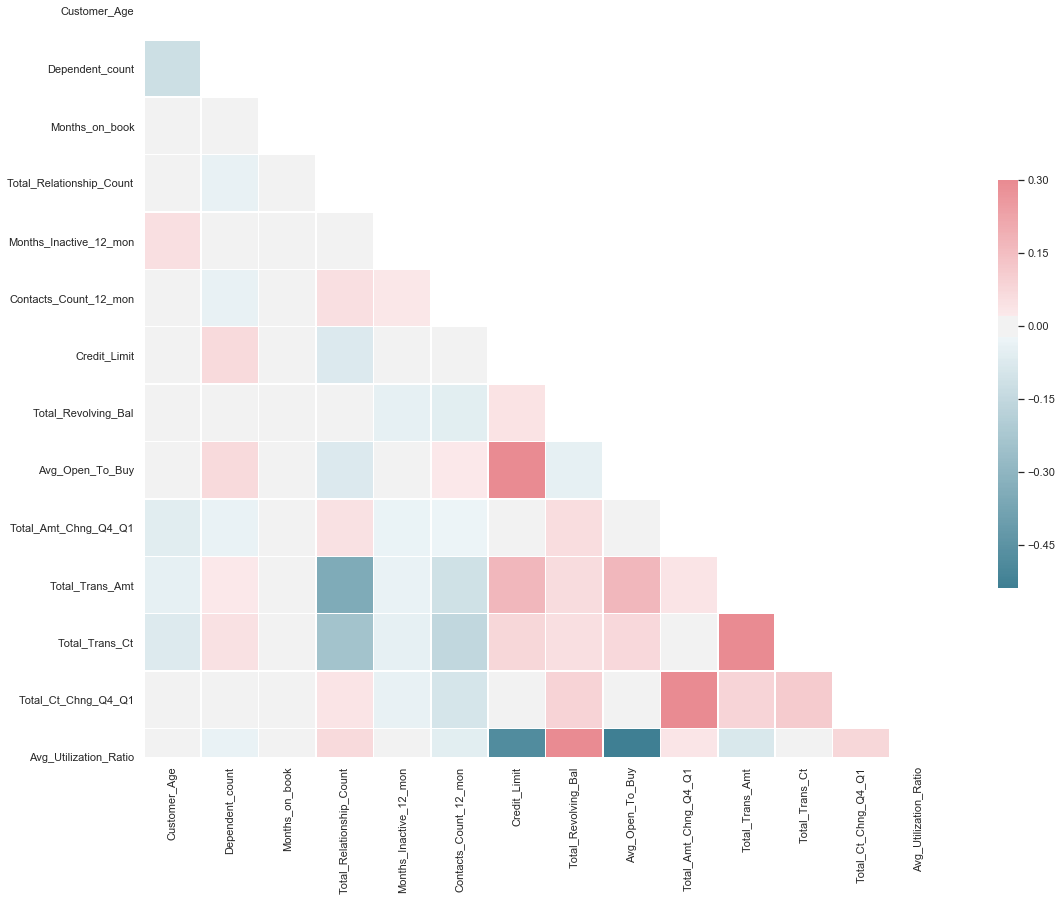

In [33]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = numerical_col.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

/Users/horiaiulian/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'PDF of inactivity past 12  for target variable Attrition_Flag')

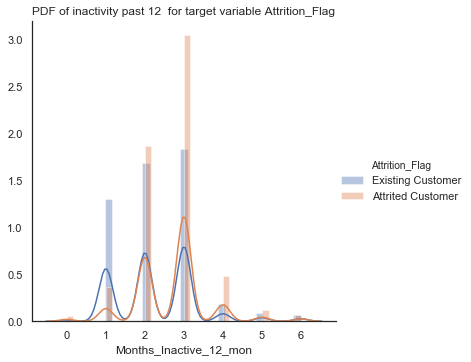

In [34]:
sns.FacetGrid(data, hue='Attrition_Flag', size=5) \
.map(sns.distplot, 'Months_Inactive_12_mon') \
.add_legend()
plt.title('PDF of inactivity past 12  for target variable Attrition_Flag')